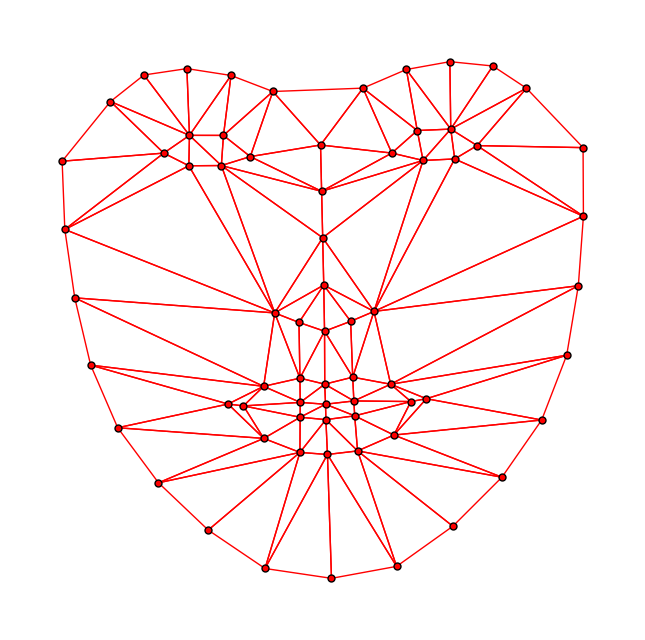

In [41]:
#import and show data
import os
import glob
import menpo.io as mio
from menpo.visualize import print_progress
from menpo.landmark import labeller, face_ibug_68_to_face_ibug_68_trimesh
from menpowidgets import visualize_images
from menpofit.aam import HolisticAAM
from menpofit.aam import PatchAAM
from menpo.feature import fast_dsift
from menpo.feature import igo
from menpofit.aam import LucasKanadeAAMFitter, WibergInverseCompositional
%matplotlib inline


def process(image, crop_proportion=0.2, max_diagonal=400):
    if image.n_channels == 3:
        image = image.as_greyscale()
    image = image.crop_to_landmarks_proportion(crop_proportion)
    d = image.diagonal()
    if d > max_diagonal:
        image = image.rescale(float(max_diagonal) / d)
    
    labeller(image, 'PTS', face_ibug_68_to_face_ibug_68_trimesh)
    return image

path_to_database = '/Programing/GR/dataset/lfpw/trainset'
#print(mio.input.base.glob_with_suffix(path_to_database))
training_images = []
for img in print_progress(mio.import_images(path_to_database, verbose=True)):
    training_images.append(process(img))

#visualize_images(training_images)

aam = HolisticAAM(training_images, group='face_ibug_68_trimesh', diagonal=150,
                  scales=(0.5, 1.0), holistic_features=fast_dsift, verbose=True,
                  max_shape_components=20, max_appearance_components=150)

#aam = PatchAAM(training_images, group='PTS', patch_shape=[(15, 15), (23, 23)],
#                     diagonal=150, scales=(0.5, 1.0), holistic_features=fast_dsift,
#                     max_shape_components=20, max_appearance_components=150,
#                     verbose=True)

aam.view_shape_models_widget()


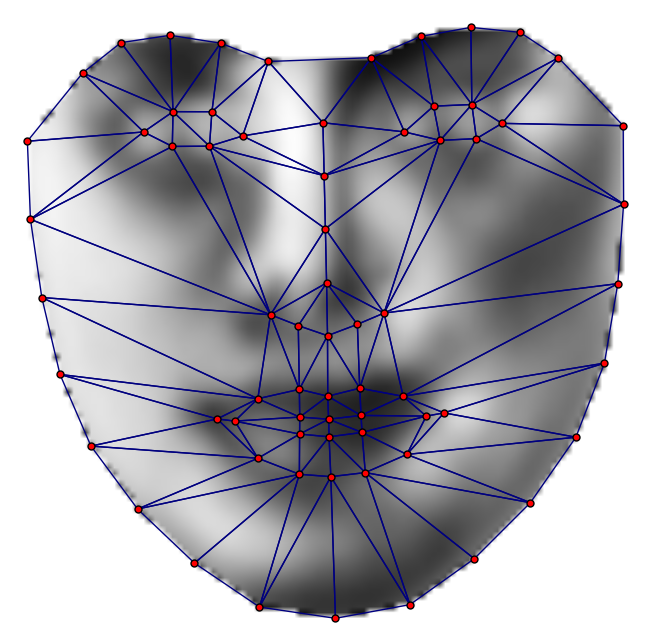

In [42]:
aam.view_aam_widget()

In [43]:
from menpofit.aam import LucasKanadeAAMFitter, WibergInverseCompositional

fitter = LucasKanadeAAMFitter(aam, lk_algorithm_cls=WibergInverseCompositional,
                              n_shape=[5, 20], n_appearance=[30, 150])
print(fitter)

Holistic Active Appearance Model
 - Images scaled to diagonal: 150.00
 - Images warped with DifferentiablePiecewiseAffine transform
 - Scales: [0.5, 1.0]
   - Scale 0.5
     - Holistic feature: dsift
     - Appearance model class: PCAModel
       - 150 appearance components
     - Shape model class: OrthoPDM
       - 20 shape components
       - 4 similarity transform parameters
   - Scale 1.0
     - Holistic feature: dsift
     - Appearance model class: PCAModel
       - 150 appearance components
     - Shape model class: OrthoPDM
       - 20 shape components
       - 4 similarity transform parameters
Wiberg Inverse Compositional Algorithm
 - Scales: [0.5, 1.0]
   - Scale 0.5
     - 5 active shape components
     - 4 similarity transform components
     - 30 active appearance components
   - Scale 1.0
     - 20 active shape components
     - 4 similarity transform components
     - 150 active appearance components
    


D:\Program\Anaconda\envs\GR\lib\site-packages\menpo\image\base.py:2652: MenpoDeprecationWarning: This method is no longer supported and will be removed in a future version of Menpo. Use .pixels_with_channels_at_back instead.
  MenpoDeprecationWarning)


1 detected faces.


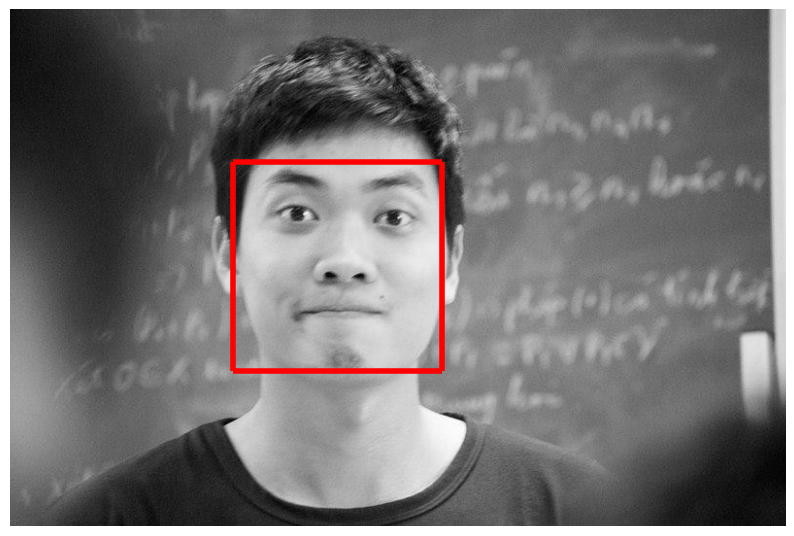

In [44]:
from pathlib import Path
import menpo.io as mio
from menpodetect import load_dlib_frontal_face_detector

path_to_test = Path('/Programing/GR/Code/CK+/test_images')

image = mio.import_image(path_to_test / '1.jpg')
if image.n_channels == 3:
        image = image.as_greyscale()
        

# Load detector
detect = load_dlib_frontal_face_detector()

# Detect
bboxes = detect(image)
print("{} detected faces.".format(len(bboxes)))

# View
if len(bboxes) > 0:
    image.view_landmarks(group='dlib_0', line_colour='red',
                         render_markers=False, line_width=4);
    

D:\Program\Anaconda\envs\GR\lib\site-packages\menpo\image\base.py:2652: MenpoDeprecationWarning: This method is no longer supported and will be removed in a future version of Menpo. Use .pixels_with_channels_at_back instead.
  MenpoDeprecationWarning)


Fitting result of 68 landmark points.


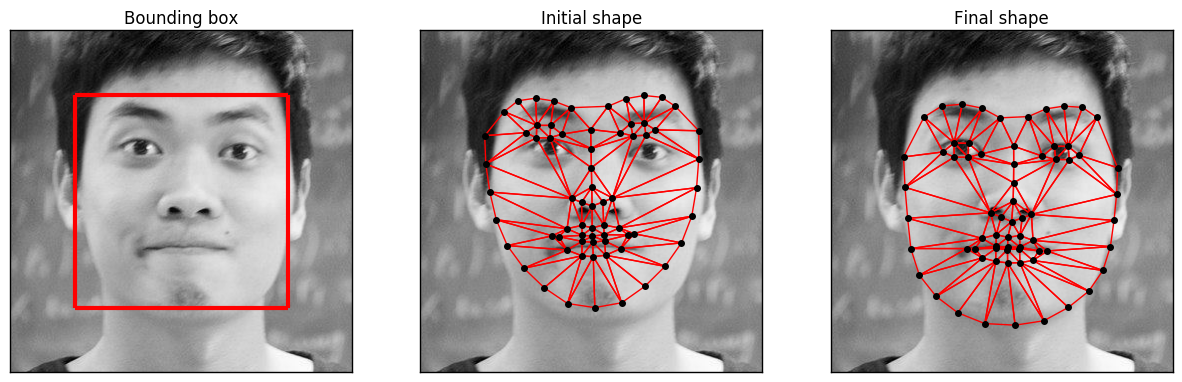

In [45]:
#harder head pose detection
import matplotlib.pyplot as plt

# Load and convert to grayscale
image = mio.import_image(path_to_test / '1.jpg')
if image.n_channels == 3:
        image = image.as_greyscale()
# Detect face
bboxes = detect(image)

# Crop the image for better visualization of the result
image = image.crop_to_landmarks_proportion(0.3, group='dlib_0')
bboxes[0] = image.landmarks['dlib_0'].lms

if len(bboxes) > 0:
    # Fit AAM
    result = fitter.fit_from_bb(image, bboxes[0], max_iters=[15, 5])
    print(result)

    # Visualize
    plt.subplot(131);
    image.view()
    bboxes[0].view(line_width=3, render_markers=False)
    plt.gca().set_title('Bounding box')

    plt.subplot(132)
    image.view()
    result.initial_shape.view(marker_size=4)
    plt.gca().set_title('Initial shape')

    plt.subplot(133)
    image.view()
    result.final_shape.view(marker_size=4, figure_size=(15, 13))
    plt.gca().set_title('Final shape')

In [26]:
print(dir(result))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_appearance_parameters', '_costs', '_final_shape', '_gt_shape', '_image', '_initial_shape', '_n_iters', '_n_iters_per_scale', '_n_scales', '_reconstruction_indices', '_shape_parameters', '_shapes', 'appearance_parameters', 'costs', 'displacements', 'displacements_stats', 'errors', 'final_error', 'final_shape', 'gt_shape', 'image', 'initial_error', 'initial_shape', 'is_iterative', 'n_iters', 'n_iters_per_scale', 'n_scales', 'plot_costs', 'plot_displacements', 'plot_errors', 'reconstructed_initial_error', 'reconstructed_initial_shapes', 'shape_parameters', 'shapes', 'to_result', 'view', 'view_iterations', 'view_widget']


In [59]:
result.final_shape.points

array([[ 141.01574648,   81.3993883 ],
       [ 173.44730806,   83.28258228],
       [ 205.53573645,   87.65904381],
       [ 237.23971389,   94.27786563],
       [ 267.8675906 ,  104.82666717],
       [ 295.84742269,  121.06587572],
       [ 320.34175875,  142.3022049 ],
       [ 338.20440192,  169.18344727],
       [ 344.14230199,  200.56888803],
       [ 338.03593197,  230.6988561 ],
       [ 320.71862011,  256.11713463],
       [ 296.59725432,  275.70577866],
       [ 269.99800222,  291.50665764],
       [ 240.7560277 ,  301.51327483],
       [ 210.33009853,  307.08925309],
       [ 179.55811837,  310.48925191],
       [ 148.8479413 ,  312.09804266],
       [ 111.34550306,  107.00771946],
       [ 102.57958962,  122.99819935],
       [ 100.37587454,  141.15122212],
       [ 102.0542356 ,  159.59358739],
       [ 106.84693058,  177.09055441],
       [ 108.47304808,  220.39165407],
       [ 103.76356072,  237.427268  ],
       [ 102.6957088 ,  255.2133056 ],
       [ 105.35855834,  2

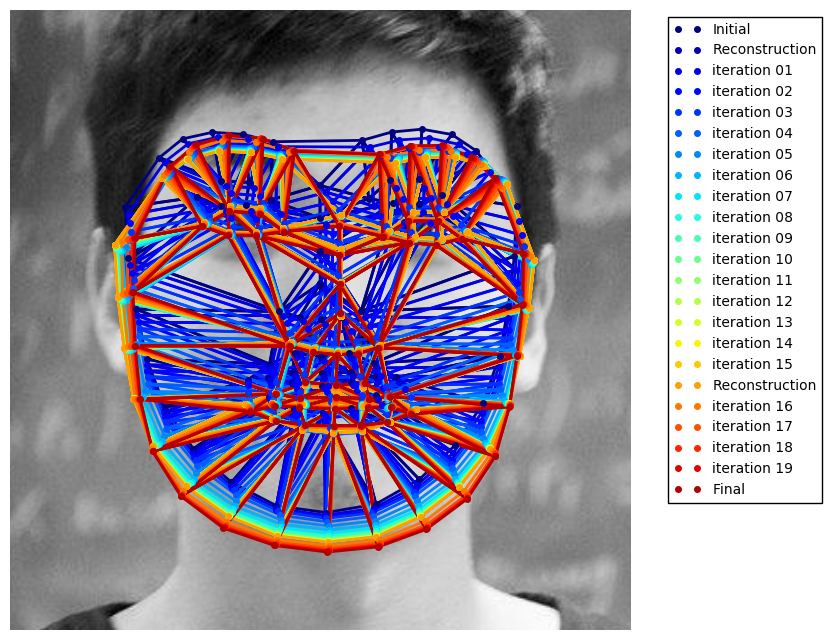

In [13]:
result.view_iterations()

In [14]:
result.plot_errors()

ValueError: Ground truth shape has not been set, so the errors per iteration cannot be computed